Context
The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

In [1]:
#Importing Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
%matplotlib inline

In [2]:
#Importing Dataset
df = pd.read_csv(r"C:\Users\swara\OneDrive\Desktop\Bankruptcy\Bankruptcy Prediction.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


# Basic EDA

In [3]:
#Display all the columns present in our dataset
pd.set_option('display.max_columns', None)

In [4]:
#Describing the data 
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
#Searching for null value if there are any
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [7]:
#Searching for duplicated values if there are any
df.duplicated().sum()

0

In [8]:
df.duplicated().any()

False

<Axes: >

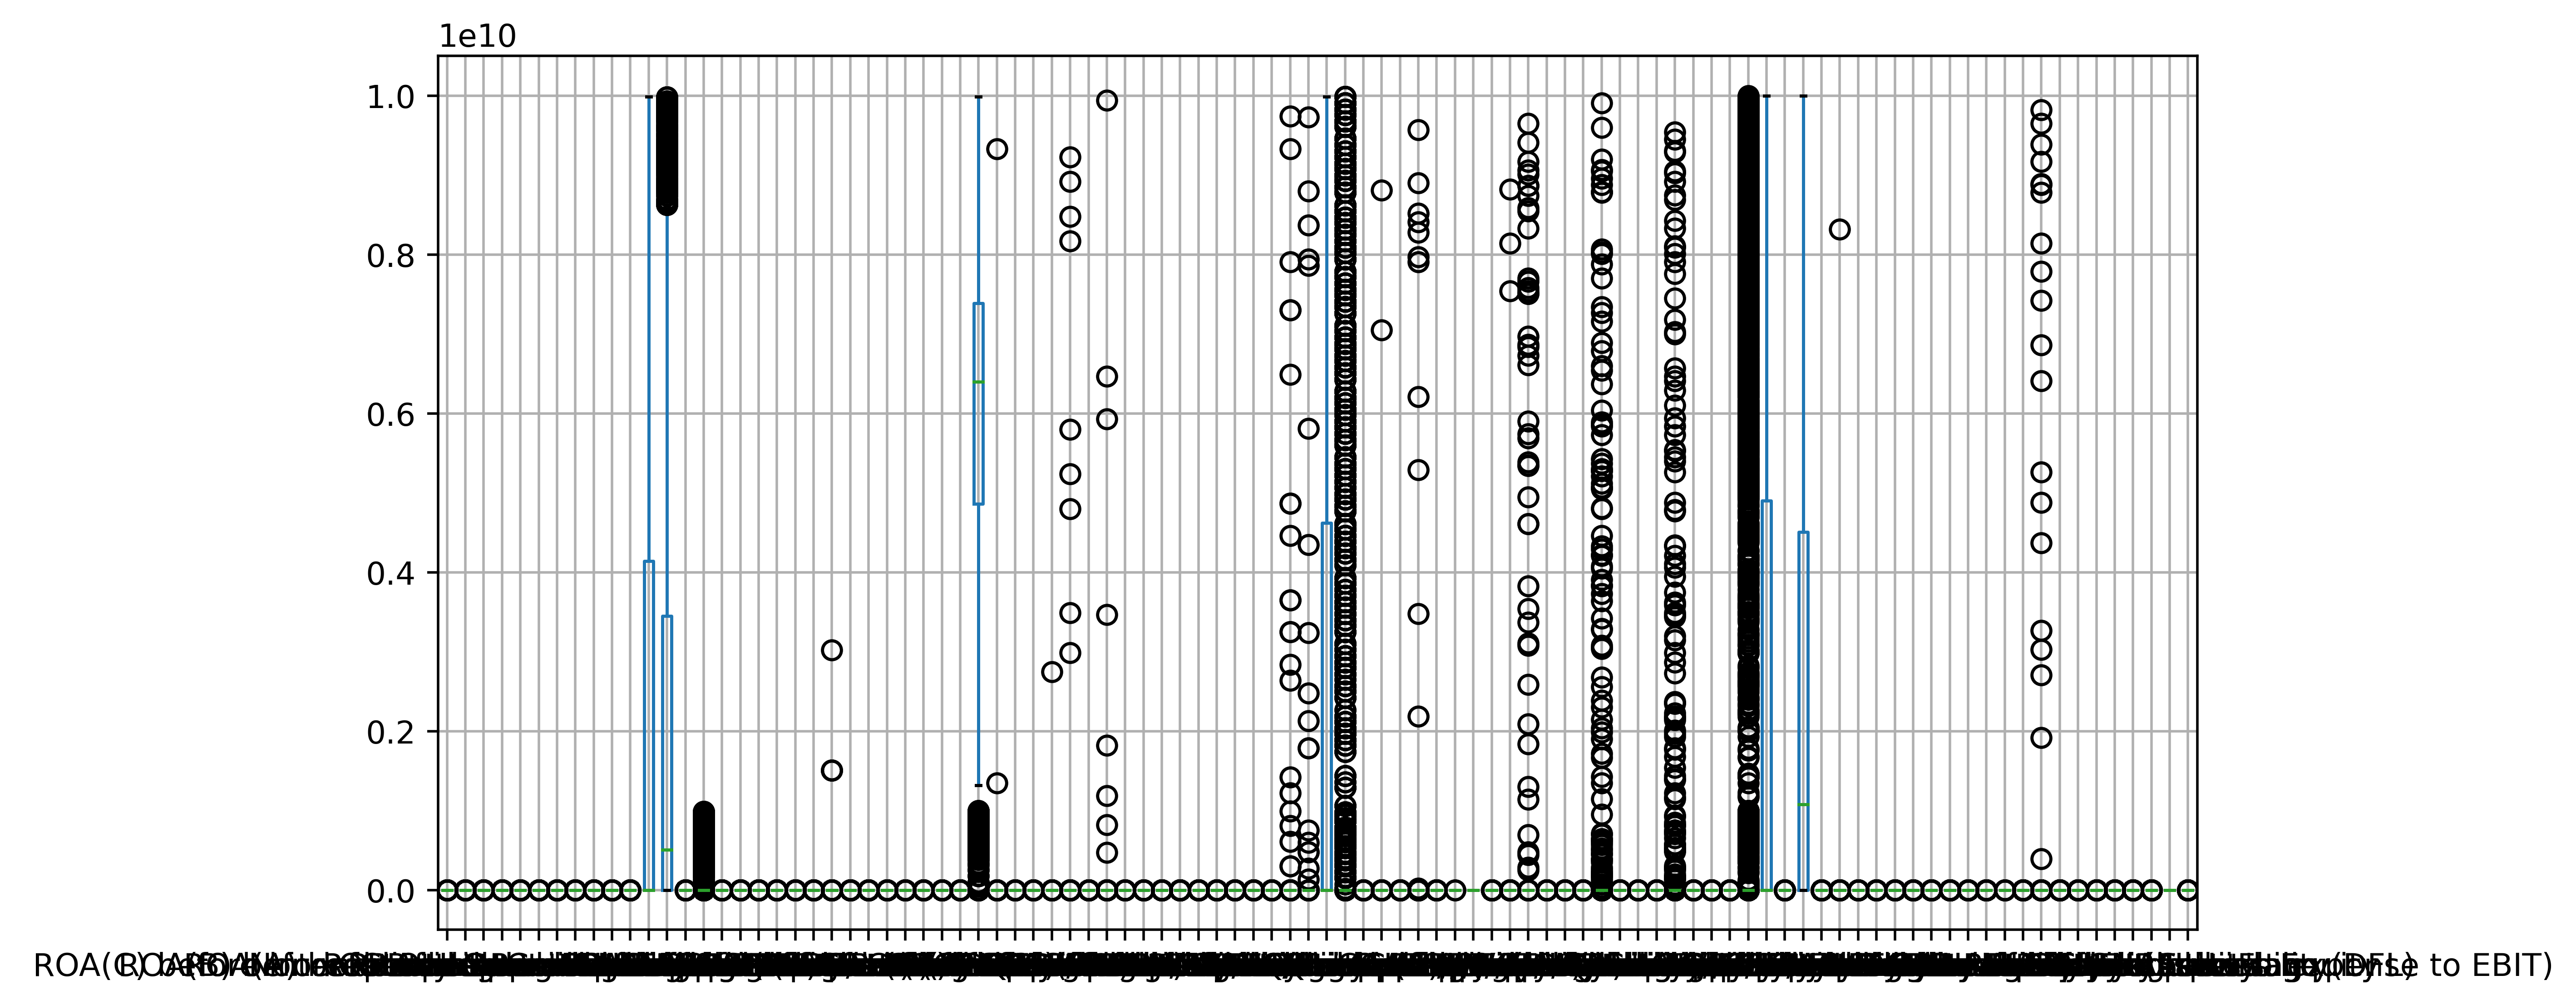

In [9]:
#Searching for outliers if there are any
df.boxplot()

In [10]:
# Dividing target column and independet column into y and x
# x as all the independent column
# y as our target column
 
x = df.drop(columns="Bankrupt?")
y = df["Bankrupt?"]

In [11]:
#Independent column
x

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.

In [12]:
#Target column
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [13]:
# As there are many outliers present in our dataset we need fill the gap
def outlier_detection(data, cols):
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)

        iqr = q3 - q1

        lower = q1 - (1.5 * iqr)
        upper = q3 + (1.5 * iqr)

        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

In [14]:
outlier_detection(df,x.columns)

<Axes: >

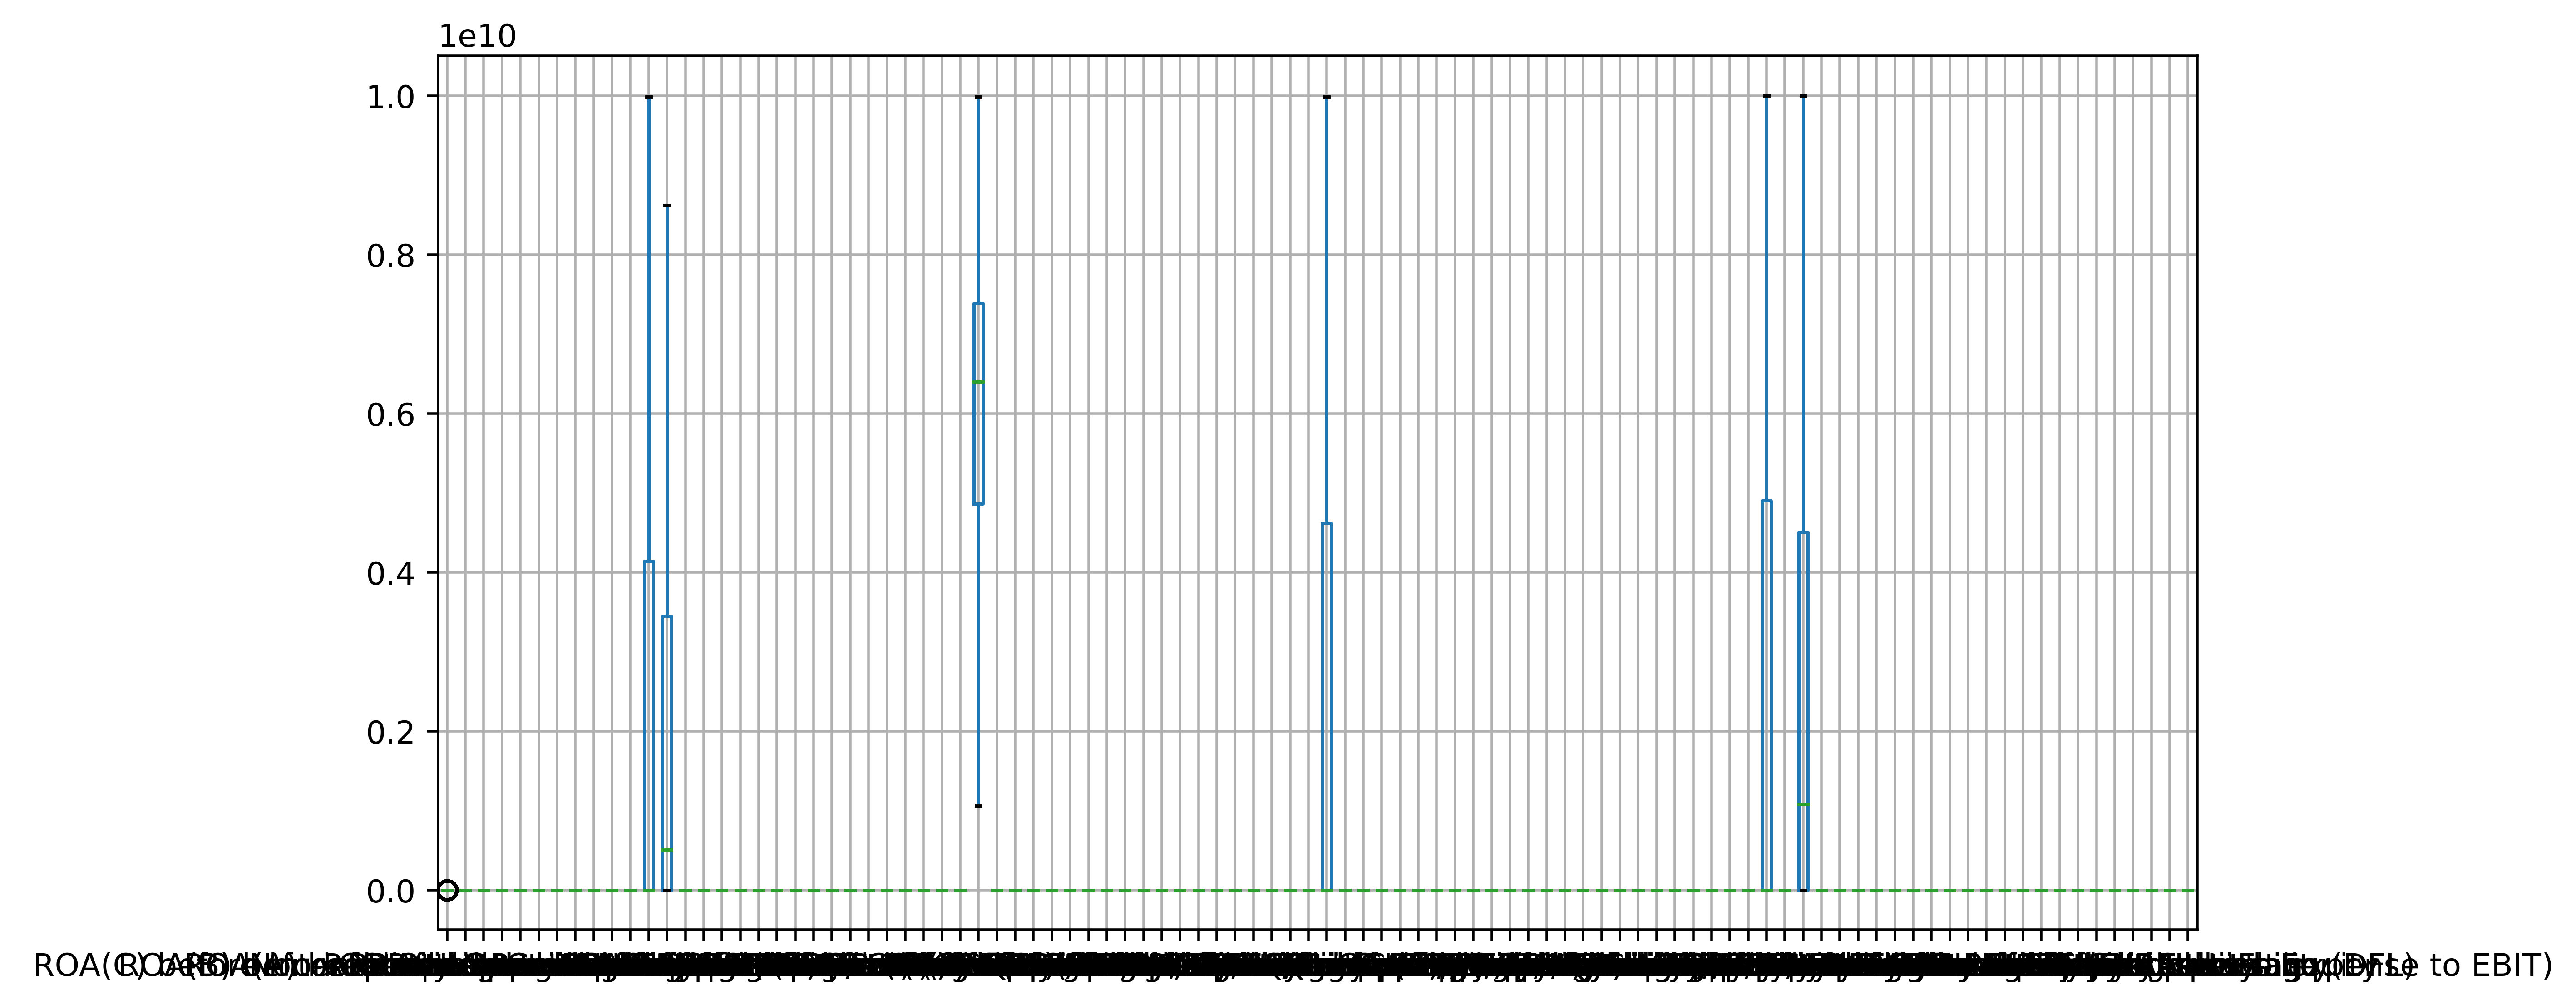

In [15]:
#All outliers are removed
df.boxplot()

In [16]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Text(0.5, 1.0, 'Bankrupt')

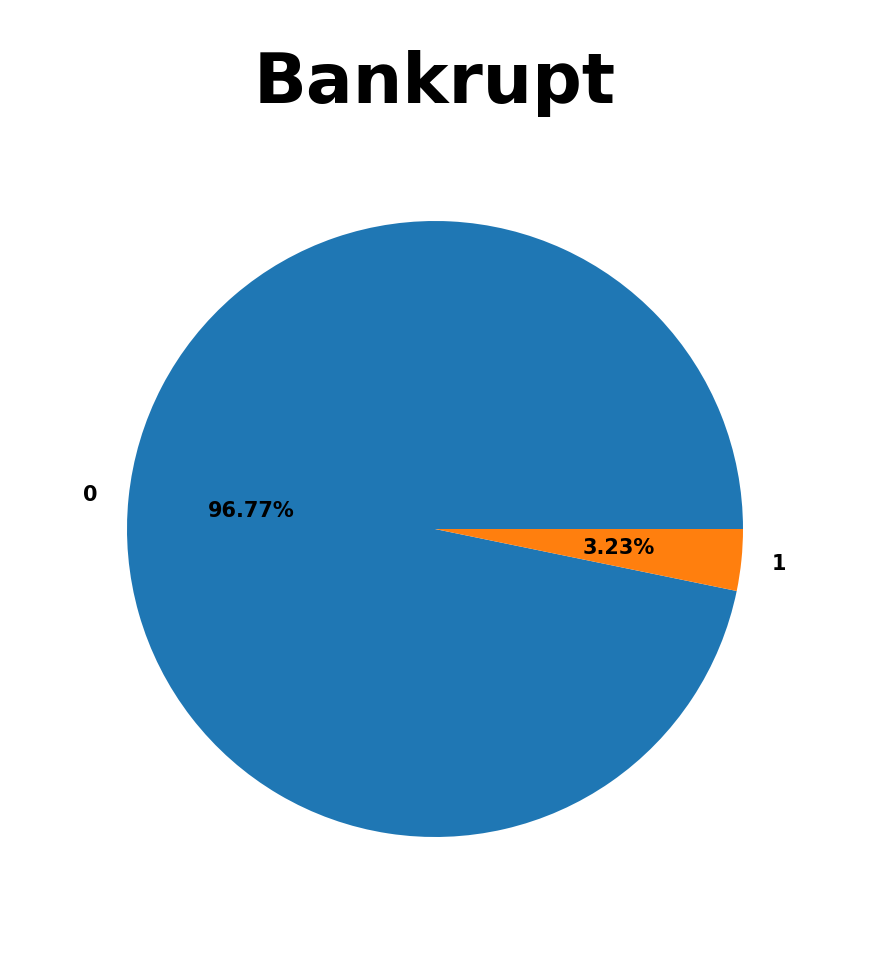

In [17]:
# Pie chart for our target column bankrupt
plt.figure(figsize=(5,2))
plt.pie(df["Bankrupt?"].value_counts(),
        labels=df["Bankrupt?"].value_counts().index,
        autopct= '%.2f%%',
        textprops = {'size' : 3, 'fontweight': 'bold'})

plt.title("Bankrupt", fontsize = 10, fontweight = "bold")

Text(0.5, 1.0, 'Barplot for Bankrupt')

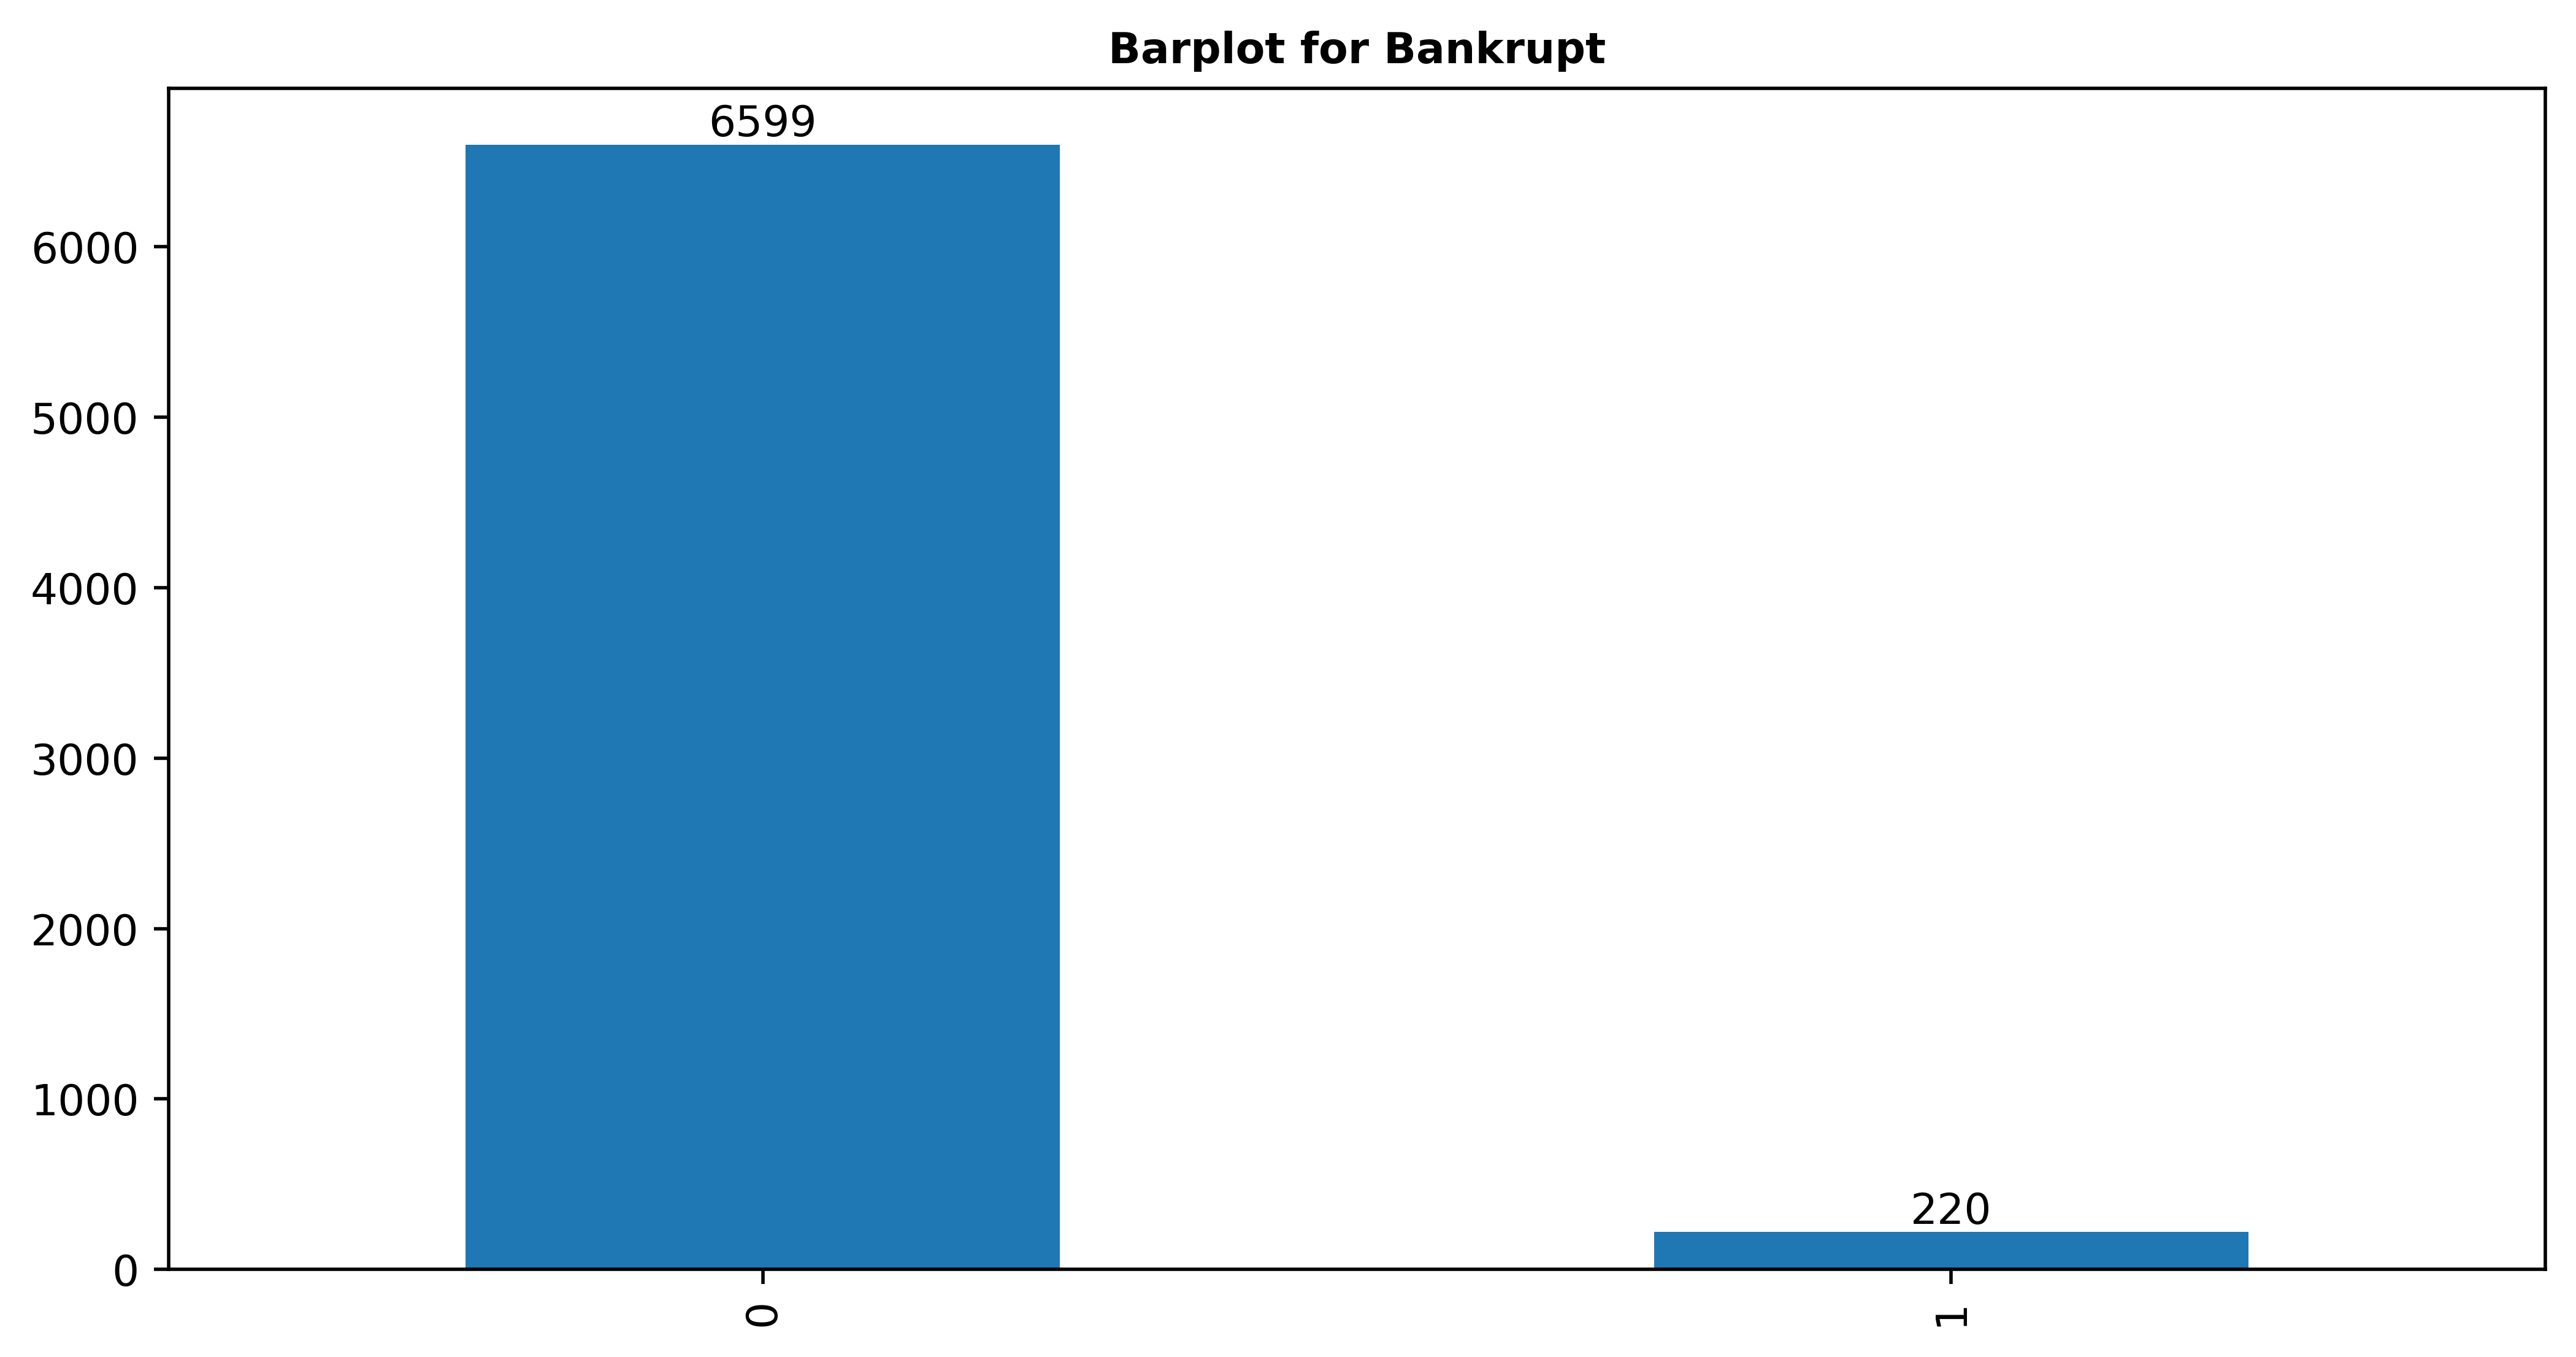

In [18]:
#Barplot for Bankrupt
barplot = df["Bankrupt?"].value_counts().plot(kind = 'bar')

for i in barplot.containers:
    barplot.bar_label(i)

plt.title("Barplot for Bankrupt", fontsize = 10, fontweight = "bold")

# Balancing target labels

In [19]:
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

In [20]:
smote = BorderlineSMOTE()
x, y = smote.fit_resample(x, y)

In [21]:
print("Final dimensions of target label classes:", Counter(y))

Final dimensions of target label classes: Counter({1: 6599, 0: 6599})


In [22]:
x.shape

(13198, 95)

Text(0.5, 1.0, 'Barplot for Bankrupt')

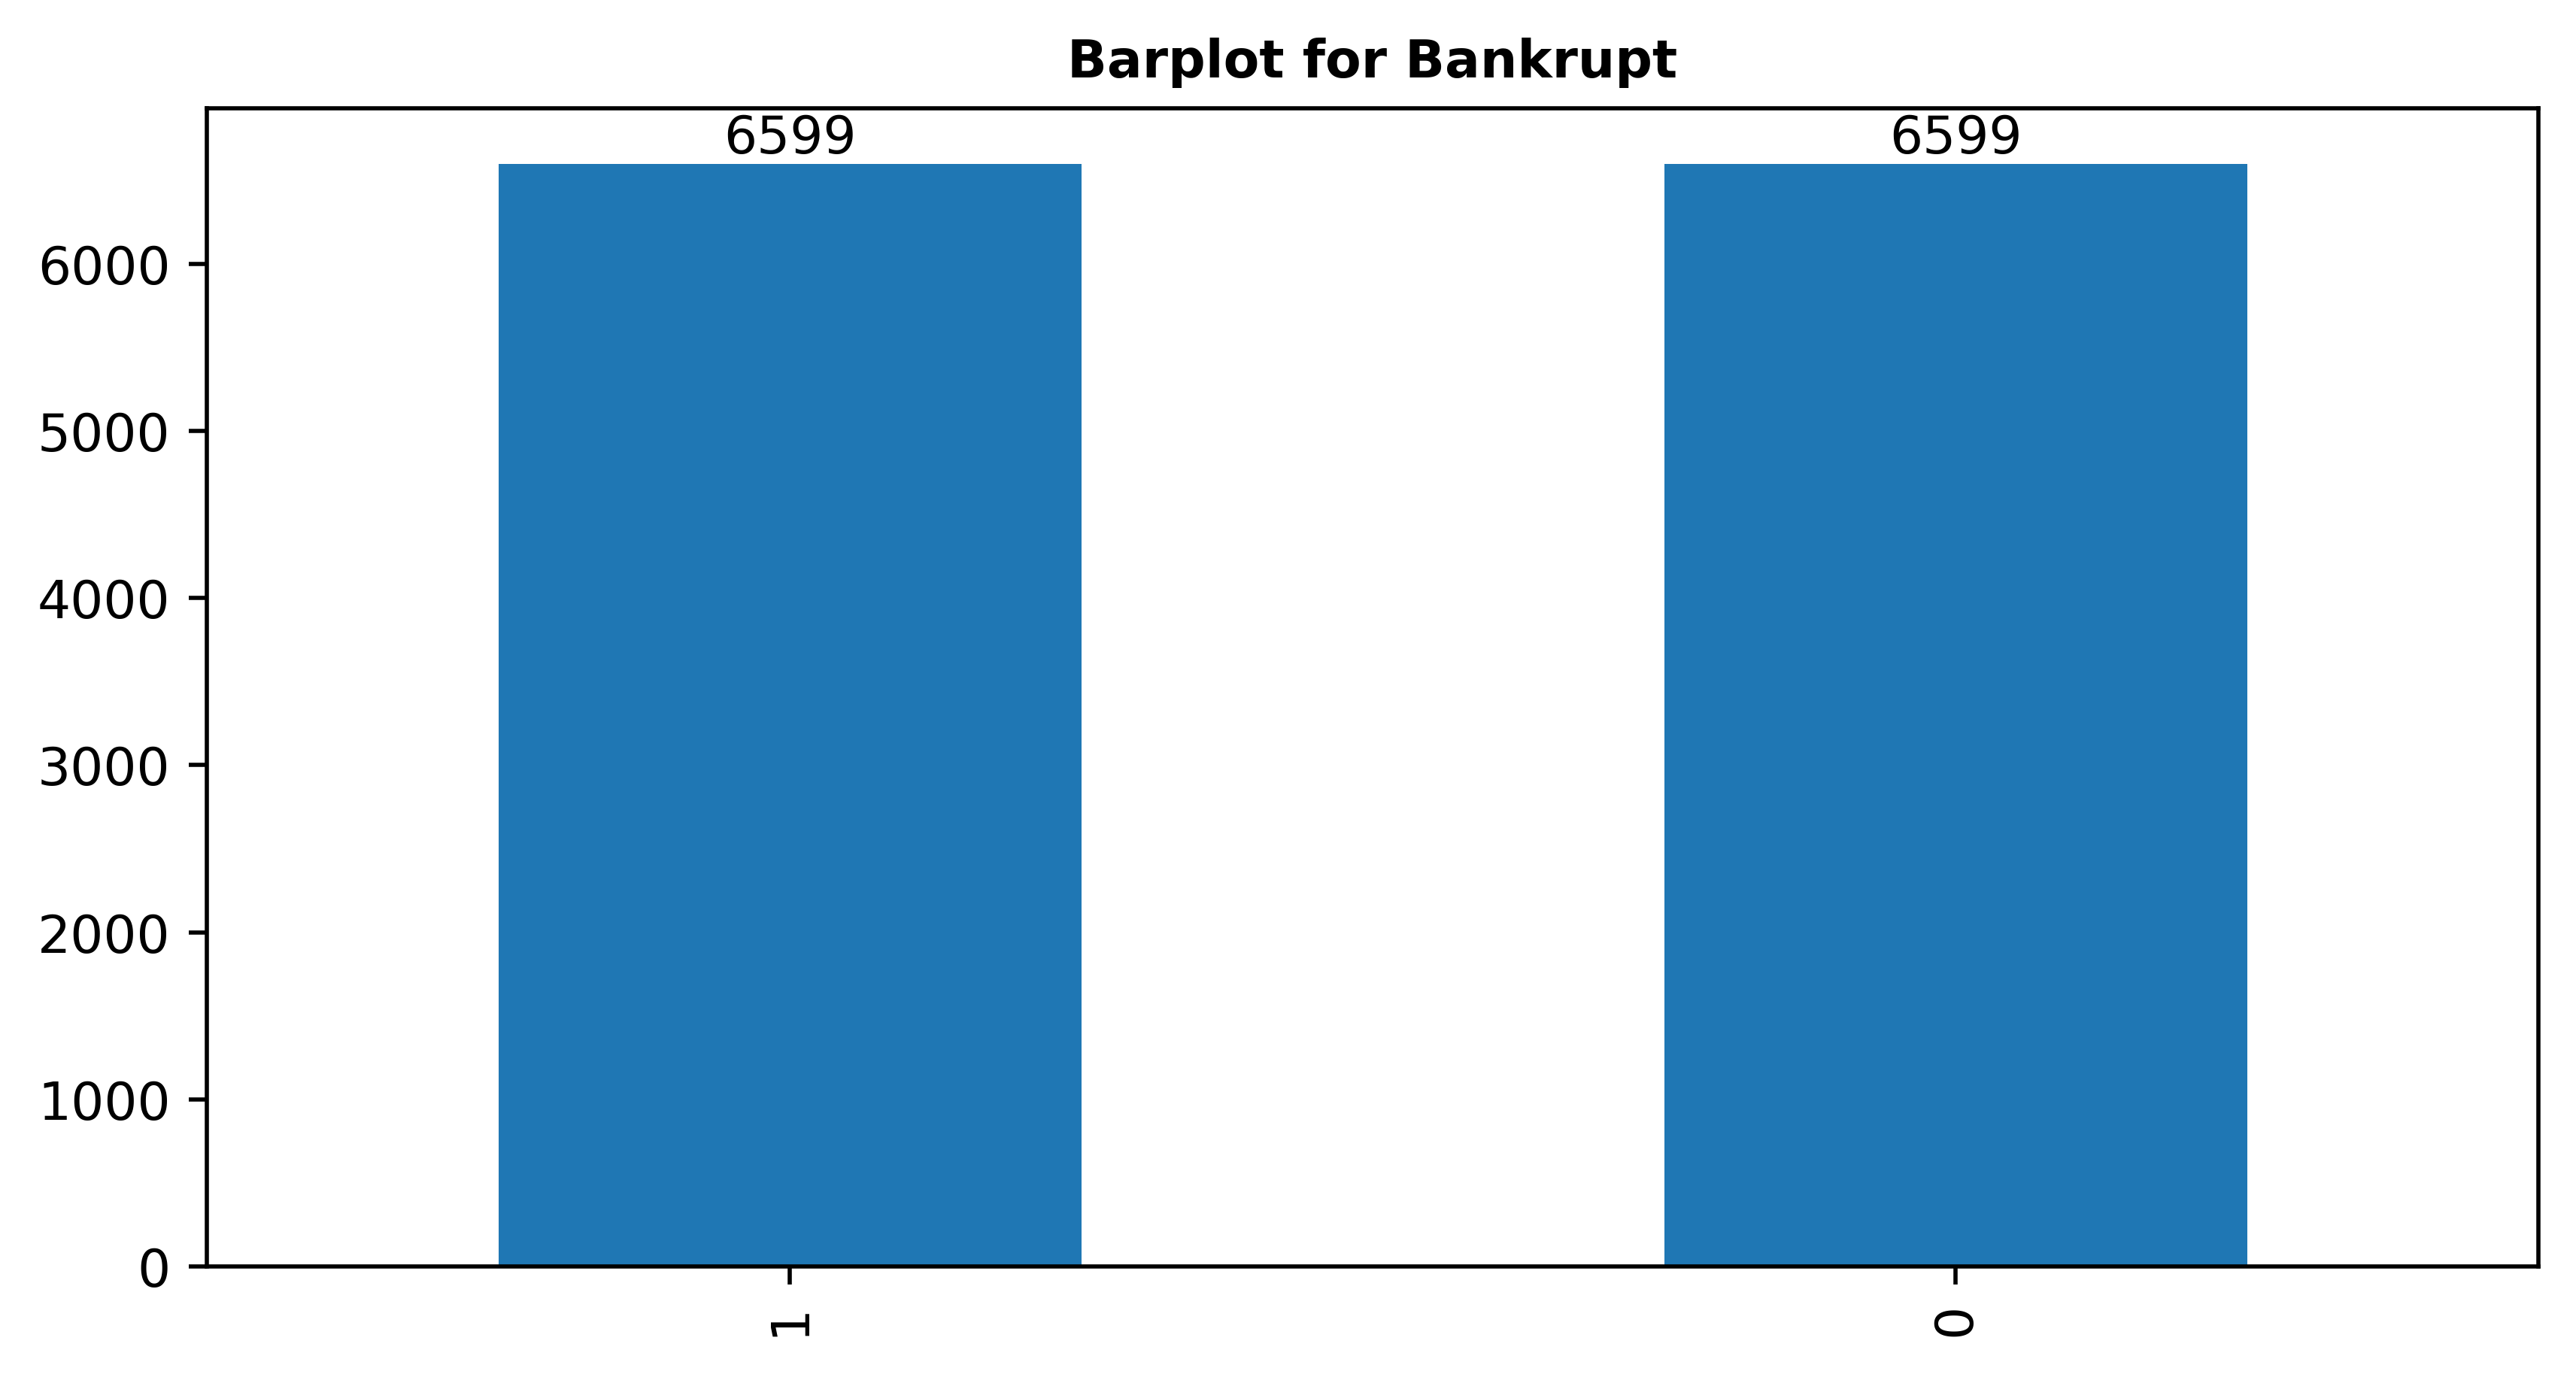

In [23]:
#Barplot for Bankrupt
plt.figure(figsize=(8,4))
barplot = y.value_counts().plot(kind = 'bar')

for i in barplot.containers:
    barplot.bar_label(i)

plt.title("Barplot for Bankrupt", fontsize = 10, fontweight = "bold")

Text(0.5, 1.0, 'Bankrupt')

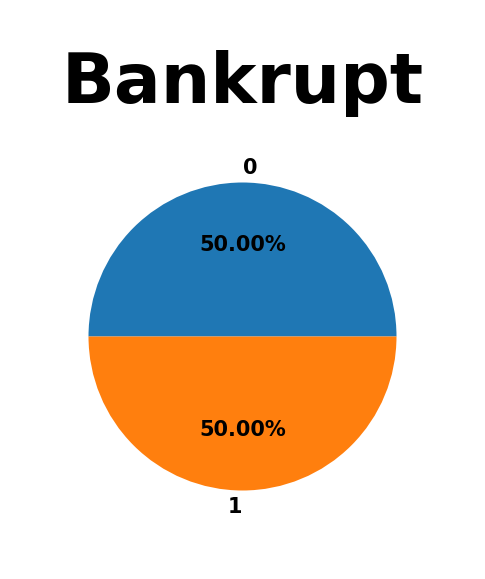

In [24]:
plt.figure(figsize=(3,1))
plt.pie(y.value_counts(),
        labels=df["Bankrupt?"].value_counts().index,
        autopct= '%.2f%%',
        textprops = {'size' : 3, 'fontweight': 'bold'})

plt.title("Bankrupt", fontsize = 10, fontweight = "bold")

# Feature Selection

In [25]:
from sklearn.feature_selection import SelectKBest, chi2 ,f_classif, RFE,mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Recursive Feature Elimination usign Logestic regression:

In [27]:
rfe = RFE(LogisticRegression())
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [28]:
rfe.ranking_

array([ 1,  1,  1, 12, 11,  1,  1,  1, 29,  1,  1,  1, 23,  1,  1, 25, 26,
       28,  9, 37,  1, 34, 15, 45,  1,  1,  1, 38,  1,  1, 36, 30,  1,  1,
        1,  1,  1, 24, 48,  3, 47, 35, 17,  6,  5,  1,  1,  1,  1, 41,  1,
       40,  1, 43,  1, 27,  1,  1,  1,  1, 39, 32,  1,  1,  1,  8,  1, 14,
       49, 19,  1,  1,  2,  1,  1,  1,  1,  7, 33, 21, 20, 42, 31, 16, 46,
       22,  1,  1, 13,  1, 10, 44,  4,  1, 18])

In [29]:
rfe.get_feature_names_out()

array([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Revenue Per Share (Yuan ¥)', ' Operating Profit Growth Rate',
       ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Total Asset Growth Rate',
       ' Net Value Growth Rate', ' Current Ratio', ' Quick Ratio',
       ' Interest Expense Ratio', ' Total debt/Total net worth',
       ' Debt ratio %', ' Accounts Receivable Turnover',
       ' Average Collection Days', ' Inventory Turnover Rate (times)',
       ' Fixed Assets Turnover Frequency', ' Revenue per person',
       ' Allocation r

In [30]:
rfe1={"column":x.columns,"Ranks":rfe.ranking_}
rfedf=pd.DataFrame(rfe1)
rfedf.sort_values("Ranks")

,column,Ranks
0,ROA(C) before interest and depreciation befor...,1
34,Interest Expense Ratio,1
35,Total debt/Total net worth,1
36,Debt ratio %,1
45,Accounts Receivable Turnover,1
...,...,...
23,Realized Sales Gross Profit Growth Rate,45
84,Liability-Assets Flag,46
40,Contingent liabilities/Net worth,47
38,Long-term fund suitability ratio (A),48


In [31]:
rfedf[rfedf["Ranks"] < 10]

,column,Ranks
0,ROA(C) before interest and depreciation befor...,1
1,ROA(A) before interest and % after tax,1
2,ROA(B) before interest and depreciation after...,1
5,Operating Profit Rate,1
6,Pre-tax net Interest Rate,1
7,After-tax net Interest Rate,1
9,Continuous interest rate (after tax),1
10,Operating Expense Rate,1
11,Research and development expense rate,1
13,Interest-bearing debt interest rate,1


# Tree Based Method

In [32]:
dt = DecisionTreeClassifier()

dt.fit(x,y)

DecisionTreeClassifier()

In [33]:
dt.feature_importances_

array([1.28993509e-02, 4.04101632e-04, 1.74729543e-03, 0.00000000e+00,
       7.88559434e-04, 1.14979207e-03, 0.00000000e+00, 0.00000000e+00,
       7.68558299e-03, 5.26945371e-01, 1.26458016e-03, 2.11854867e-03,
       0.00000000e+00, 1.28196573e-02, 1.87520414e-03, 2.59779620e-04,
       1.01636734e-03, 0.00000000e+00, 4.54614336e-04, 2.95419003e-04,
       4.84921958e-04, 5.04698870e-03, 2.96890995e-04, 1.93687791e-03,
       1.19223648e-02, 3.59426477e-03, 1.13870636e-03, 9.71102232e-04,
       8.14044198e-03, 2.69401088e-04, 6.33299422e-03, 2.02050816e-04,
       1.91898066e-03, 1.20588353e-03, 1.11640354e-02, 1.04121427e-01,
       5.85947366e-04, 0.00000000e+00, 2.37427202e-03, 5.54189322e-02,
       1.94864564e-03, 1.70278484e-03, 0.00000000e+00, 9.86053997e-04,
       2.86696586e-03, 2.71533897e-03, 1.21025071e-02, 1.13362898e-02,
       7.83089268e-03, 1.43989194e-03, 1.31012982e-03, 1.55616758e-03,
       4.37052361e-03, 2.39073472e-03, 5.34171018e-03, 5.99975354e-04,
      

In [34]:
dt={"column":x.columns,"Imp":dt.feature_importances_}
dtdf=pd.DataFrame(dt)
dtdf.sort_values("Imp",ascending=False)

,column,Imp
9,Continuous interest rate (after tax),0.526945
35,Total debt/Total net worth,0.104121
39,Borrowing dependency,0.055419
89,Net Income to Stockholder's Equity,0.033854
56,Cash/Total Assets,0.020266
...,...,...
42,Net profit before tax/Paid-in capital,0.000000
6,Pre-tax net Interest Rate,0.000000
3,Operating Gross Margin,0.000000
72,Working capitcal Turnover Rate,0.000000


In [35]:
dtdf[dtdf["Imp"] > 0.01]

,column,Imp
0,ROA(C) before interest and depreciation befor...,0.012899
9,Continuous interest rate (after tax),0.526945
13,Interest-bearing debt interest rate,0.012820
24,Operating Profit Growth Rate,0.011922
34,Interest Expense Ratio,0.011164
35,Total debt/Total net worth,0.104121
39,Borrowing dependency,0.055419
46,Average Collection Days,0.012103
47,Inventory Turnover Rate (times),0.011336
56,Cash/Total Assets,0.020266


## Univariate selection:

In [36]:
#chi2
test  = SelectKBest(score_func=chi2,k=10)
test_fit=test.fit(x,y)
d={"column":x.columns,"scores":test_fit.scores_}
chi2=pd.DataFrame(d)
chi2.sort_values("scores",ascending=False)

,column,scores
48,Fixed Assets Turnover Frequency,4.863079e+12
58,Cash/Current Liability,1.857169e+12
71,Quick Asset Turnover Rate,1.371624e+12
11,Research and development expense rate,1.250378e+12
10,Operating Expense Rate,7.973163e+11
...,...,...
72,Working capitcal Turnover Rate,2.959570e-05
5,Operating Profit Rate,1.297985e-05
74,Cash Flow to Sales,3.133336e-06
61,Inventory/Working Capital,4.079805e-07


In [37]:
print(x.columns[test.get_support()])

Index([' Operating Expense Rate', ' Research and development expense rate',
       ' Net Value Growth Rate', ' Fixed Assets Turnover Frequency',
       ' Cash/Current Liability', ' Inventory/Current Liability',
       ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate',
       ' Cash Turnover Rate', ' Fixed Assets to Assets'],
      dtype='object')


In [38]:
#Anova
test1 = SelectKBest(score_func=f_classif,k=10)
test1_fit=test1.fit(x,y)
df1={"column":x.columns,"scores":test_fit.scores_}
anova=pd.DataFrame(d)
anova.sort_values("scores",ascending=False)

,column,scores
48,Fixed Assets Turnover Frequency,4.863079e+12
58,Cash/Current Liability,1.857169e+12
71,Quick Asset Turnover Rate,1.371624e+12
11,Research and development expense rate,1.250378e+12
10,Operating Expense Rate,7.973163e+11
...,...,...
72,Working capitcal Turnover Rate,2.959570e-05
5,Operating Profit Rate,1.297985e-05
74,Cash Flow to Sales,3.133336e-06
61,Inventory/Working Capital,4.079805e-07


In [39]:
X=test1.get_feature_names_out()

In [40]:
X

array([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Net profit before tax/Paid-in capital',
       ' Working Capital to Total Assets', ' Net Income to Total Assets'],
      dtype=object)

In [41]:
final_X_train = X_train[X]
final_X_test = X_test[X]

In [42]:
final_X_test

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Net Income to Total Assets
5665,0.441671,0.483755,0.486803,0.195991,0.155381,0.147232,0.852768,0.154634,0.832828,0.765757
9124,0.285687,0.334638,0.315923,0.140711,0.114055,0.221563,0.778437,0.118976,0.771958,0.637044
5163,0.715351,0.790558,0.773542,0.762693,0.635159,0.102881,0.897119,0.634749,0.910923,0.918487
12654,0.415768,0.480977,0.468483,0.182240,0.141028,0.224715,0.775285,0.144689,0.785405,0.760507
9515,0.475574,0.495918,0.514981,0.199726,0.159823,0.144954,0.855046,0.159030,0.704537,0.770412
...,...,...,...,...,...,...,...,...,...,...
2474,0.627992,0.705299,0.687135,0.313605,0.252994,0.068084,0.931916,0.252085,0.750731,0.884811
2522,0.480866,0.520225,0.526955,0.211402,0.167357,0.076337,0.923663,0.166360,0.720728,0.788511
6119,0.511627,0.542575,0.554419,0.221707,0.175115,0.129244,0.870756,0.173969,0.778976,0.800300
10790,0.437558,0.492087,0.487509,0.201423,0.159441,0.152018,0.847982,0.158446,0.774305,0.762343


In [43]:
final_X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Net Income to Total Assets
8928,0.359656,0.404935,0.401026,0.137775,0.105580,0.267826,0.732174,0.107604,0.758261,0.703957
6847,0.438626,0.506903,0.486082,0.193562,0.153972,0.174731,0.825269,0.155394,0.856903,0.779578
4292,0.483108,0.549335,0.535414,0.220384,0.175040,0.231097,0.768903,0.174089,0.772383,0.802565
1042,0.496807,0.557621,0.548905,0.230406,0.183023,0.054781,0.945219,0.182053,0.803869,0.811889
2389,0.435431,0.470944,0.460196,0.201380,0.163516,0.043656,0.956344,0.162529,0.757423,0.759811
...,...,...,...,...,...,...,...,...,...,...
11964,0.472823,0.521041,0.526802,0.207239,0.164339,0.183197,0.816803,0.163332,0.789445,0.787245
5191,0.550870,0.620148,0.610793,0.261605,0.211192,0.077546,0.922454,0.207006,0.878363,0.843680
5390,0.581339,0.644407,0.633706,0.264347,0.217670,0.066179,0.933821,0.212902,0.850151,0.855711
860,0.578560,0.627780,0.610311,0.284202,0.243805,0.076004,0.923996,0.242885,0.860293,0.849747


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier



In [71]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier(random_state=42)
nb_model = GaussianNB()
XGB_model = XGBClassifier(random_state=42)

# Train models
rf_model.fit(final_X_train, y_train)
lr_model.fit(final_X_train, y_train)
svm_model.fit(final_X_train, y_train)
knn_model.fit(final_X_train, y_train)
dt_model.fit(final_X_train, y_train)
nb_model.fit(final_X_train, y_train)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

# Evaluate each model
print("Random Forest Model:")
evaluate_model(rf_model, final_X_test, y_test)

print("\nLogistic Regression Model:")
evaluate_model(lr_model, final_X_test, y_test)

print("\nSVM Model:")
evaluate_model(svm_model, final_X_test, y_test)

print("\nKNN Model:")
evaluate_model(knn_model, final_X_test, y_test)

print("Decision Tree Model:")
evaluate_model(dt_model, final_X_test, y_test)

print("Gaussian Naive Bayes Model:")
evaluate_model(nb_model, final_X_test, y_test)

print("Gradient Bosting:")
evaluate_model(XGB_model, final_X_test, y_test)

Random Forest Model:
Accuracy: 0.9515
Precision: 0.9244
Recall: 0.9824
F1 Score: 0.9525
ROC AUC Score: 0.9518
Confusion Matrix:
[[1229  105]
 [  23 1283]]

Logistic Regression Model:
Accuracy: 0.8970
Precision: 0.8807
Recall: 0.9158
F1 Score: 0.8979
ROC AUC Score: 0.8972
Confusion Matrix:
[[1172  162]
 [ 110 1196]]

SVM Model:
Accuracy: 0.9019
Precision: 0.8715
Recall: 0.9403
F1 Score: 0.9046
ROC AUC Score: 0.9023
Confusion Matrix:
[[1153  181]
 [  78 1228]]

KNN Model:
Accuracy: 0.9326
Precision: 0.8922
Recall: 0.9824
F1 Score: 0.9351
ROC AUC Score: 0.9331
Confusion Matrix:
[[1179  155]
 [  23 1283]]
Decision Tree Model:
Accuracy: 0.9303
Precision: 0.9149
Recall: 0.9472
F1 Score: 0.9308
ROC AUC Score: 0.9305
Confusion Matrix:
[[1219  115]
 [  69 1237]]
Gaussian Naive Bayes Model:
Accuracy: 0.8837
Precision: 0.8816
Recall: 0.8836
F1 Score: 0.8826
ROC AUC Score: 0.8837
Confusion Matrix:
[[1179  155]
 [ 152 1154]]
Gradient Bosting:


ValueError: feature_names mismatch: [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net worth', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Inventory and accounts receivable/Net value', ' Total Asset Turnover', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency', ' Net Worth Turnover Rate (times)', ' Revenue per person', ' Operating profit per person', ' Allocation rate per person', ' Working Capital to Total Assets', ' Quick Assets/Total Assets', ' Current Assets/Total Assets', ' Cash/Total Assets', ' Quick Assets/Current Liability', ' Cash/Current Liability', ' Current Liability to Assets', ' Operating Funds to Liability', ' Inventory/Working Capital', ' Inventory/Current Liability', ' Current Liabilities/Liability', ' Working Capital/Equity', ' Current Liabilities/Equity', ' Long-term Liability to Current Assets', ' Retained Earnings to Total Assets', ' Total income/Total expense', ' Total expense/Assets', ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate', ' Working capitcal Turnover Rate', ' Cash Turnover Rate', ' Cash Flow to Sales', ' Fixed Assets to Assets', ' Current Liability to Liability', ' Current Liability to Equity', ' Equity to Long-term Liability', ' Cash Flow to Total Assets', ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity', ' Current Liability to Current Assets', ' Liability-Assets Flag', ' Net Income to Total Assets', ' Total assets to GNP price', ' No-credit Interval', ' Gross Profit to Sales', " Net Income to Stockholder's Equity", ' Liability to Equity', ' Degree of Financial Leverage (DFL)', ' Interest Coverage Ratio (Interest expense to EBIT)', ' Net Income Flag', ' Equity to Liability'] [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %', ' Net worth/Assets', ' Net profit before tax/Paid-in capital', ' Working Capital to Total Assets', ' Net Income to Total Assets']
expected  Fixed Assets Turnover Frequency,  Revenue per person,  Current Liability to Equity,  Cash Reinvestment %,  Tax rate (A),  CFO to Assets,  Net Value Per Share (C),  Operating Profit Rate,  Contingent liabilities/Net worth,  Degree of Financial Leverage (DFL),  Cash/Current Liability,  Interest Expense Ratio,  Working capitcal Turnover Rate,  Cash Flow Per Share,  Long-term fund suitability ratio (A),  Revenue Per Share (Yuan ¥),  Total Asset Growth Rate,  Accounts Receivable Turnover,  Liability to Equity,  Current Liabilities/Liability,  Gross Profit to Sales,  Fixed Assets to Assets,  Quick Assets/Total Assets,  Operating Expense Rate,  Continuous interest rate (after tax),  Net Value Per Share (B),  After-tax net Interest Rate,  Total expense/Assets,  Research and development expense rate,  Allocation rate per person,  Regular Net Profit Growth Rate,  Cash Flow to Equity,  Cash Flow to Total Assets,  Interest Coverage Ratio (Interest expense to EBIT),  Realized Sales Gross Margin,  Cash Flow to Liability,  Operating profit/Paid-in capital,  Cash flow rate,  Total debt/Total net worth,  Current Liability to Current Assets,  Equity to Long-term Liability,  Continuous Net Profit Growth Rate,  Cash Turnover Rate,  Equity to Liability,  Cash Flow to Sales,  Current Liability to Assets,  Current Asset Turnover Rate,  Borrowing dependency,  Current Ratio,  Retained Earnings to Total Assets,  Liability-Assets Flag,  Net Worth Turnover Rate (times),  Total Asset Return Growth Rate Ratio,  Inventory and accounts receivable/Net value,  Operating profit per person,  Inventory Turnover Rate (times),  Operating Profit Growth Rate,  Net Income to Stockholder's Equity,  Quick Ratio,  Total Asset Turnover,  Current Liabilities/Equity,  Realized Sales Gross Profit Growth Rate,  Current Assets/Total Assets,  Operating Gross Margin,  Quick Asset Turnover Rate,  Quick Assets/Current Liability,  Pre-tax net Interest Rate,  Operating Funds to Liability,  Cash/Total Assets,  Long-term Liability to Current Assets,  Operating Profit Per Share (Yuan ¥),  Non-industry income and expenditure/revenue,  Net Income Flag,  Average Collection Days,  Working Capital/Equity,  Net Value Per Share (A),  After-tax Net Profit Growth Rate,  Total assets to GNP price,  Interest-bearing debt interest rate,  Inventory/Working Capital,  Inventory/Current Liability,  Total income/Total expense,  No-credit Interval,  Net Value Growth Rate,  Current Liability to Liability in input data

Random Forest Accuracy: 0.9864
Logistic Regression Accuracy: 0.6720
SVM Accuracy: 0.8803
KNN Accuracy: 0.9402
Decision Tree Accuracy: 0.9614
Gaussian Naive Bayes Accuracy: 0.5098
Gradient Boosting Accuracy: 0.9705


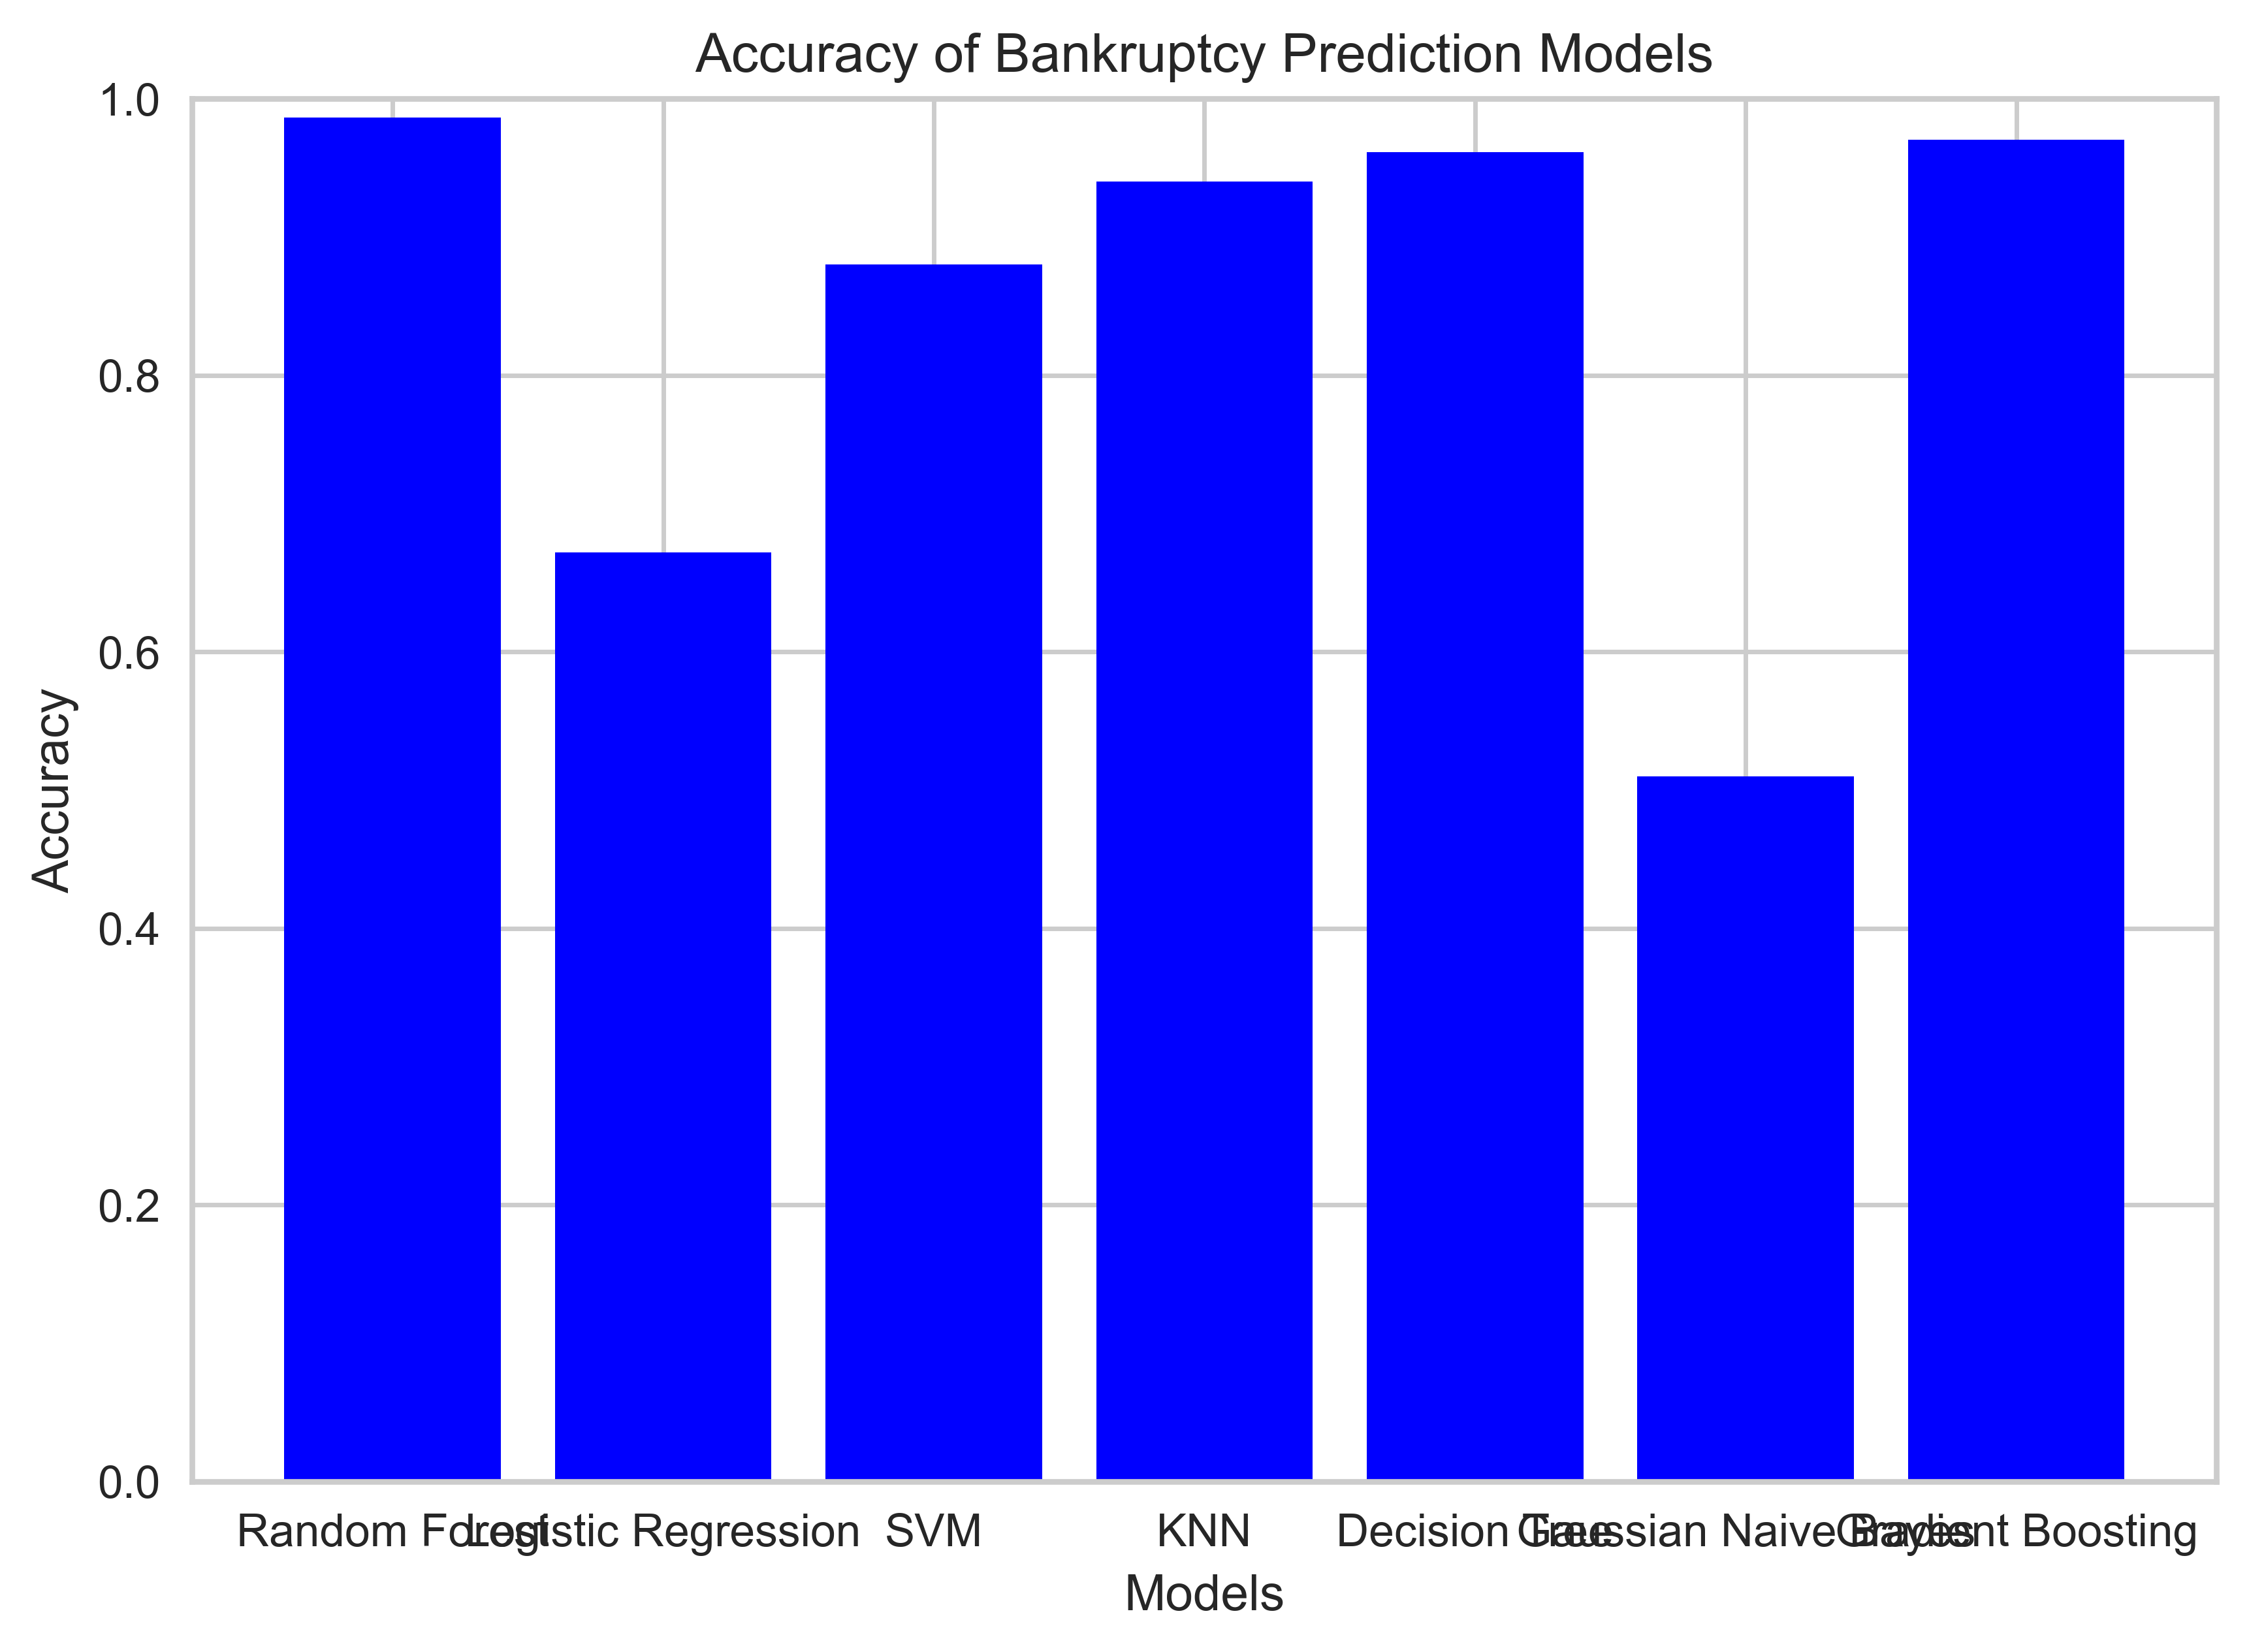

NameError: name 'fig' is not defined

In [67]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'Gaussian Naive Bayes':GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

# Train and evaluate models
model_accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Visualize accuracy using a bar graph
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Bankruptcy Prediction Models')
plt.ylim(0, 1)
plt.show()